In [1]:
import pandas as pd
import numpy as np
from glob import glob

In [2]:
df_2020 = pd.read_csv('C:/Users/ching/Desktop/practice/movie/data/df_2020.csv')

In [3]:
#今年發行之作品
condition = df_2020['上映日期'].str.contains('2020')
df_2020_0 = df_2020[condition]
df_2020_0.shape

(2475, 13)

In [4]:
#整體描述
diff = len(df_2020['中文片名'].unique()) - len(df_2020_0['中文片名'].unique())
print('2020至8月底')
print('影片數量:'+str(len(df_2020_0['中文片名'].unique()))+f'(未列入非今年發行之作品{diff}部)')
print('影片國別地區數量:'+str(len(df_2020_0['國別地區'].unique())))
print('發行公司數量:'+str(len(df_2020_0['申請人'].unique())))

2020至8月底
影片數量:416(未列入非今年發行之作品268部)
影片國別地區數量:38
發行公司數量:71


In [5]:
#今年發行的片子list
movie_list = df_2020_0['中文片名'].unique().tolist()
len(movie_list)

416

In [6]:
#以電影作品groupy,將每一部片子的發行公司list
movie_gp = df_2020_0.groupby('中文片名')
len(movie_gp)

publisher_list = []
for movie in movie_list:
    n = movie_gp.get_group(movie)['申請人'].unique().tolist()
    publisher_list.extend(n)

In [7]:
len(publisher_list)

416

In [8]:
#整理進wordcloud的發行商名稱
wctext = []

for n in range(0,len(publisher_list)):
    s = publisher_list[n].replace('股份','').replace('有限公司','').replace('台灣分公司','').replace('英屬蓋曼群島商','').replace('英屬維京群島商','').replace('美商','').replace('（遠東）','')
    wctext.append(s)

In [9]:
len(wctext)

416

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.ndimage import gaussian_gradient_magnitude
from PIL import Image

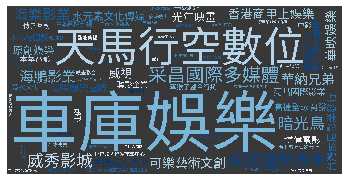

'\ncolormap Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg

In [26]:
#畫文字雲
wcloud = WordCloud(font_path = 'SourceHanSansTW-Regular.otf'
                   ,width = 1000, height = 500,
                   scale=32, max_font_size = 200,
                    background_color='#383838', colormap = 'Blues')

wcloud.generate(' '.join(wctext))

plt.imshow(wcloud)
plt.axis('off')
plt.show()
#plt.savefig("publisher_Wordcloud.png")

'''
colormap Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r
'''

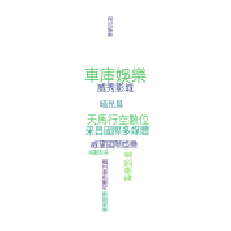

In [23]:
# Mask image
mask_color = np.array(Image.open('3.png'))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


# Edge detection
edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255


# WordCloud
wc = WordCloud(mask=mask_image,
               font_path='SourceHanSansTW-Regular.otf',
               background_color='white',
               max_font_size=80,
               random_state=42,
               relative_scaling=0)

wc.generate(' '.join(wctext))


# Plot
plt.figure()
plt.axis('off')
plt.imshow(wc)
plt.show()